# Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset


### **Introduction**
This notebook demonstrates descriptive analytics and preprocessing on a sample Sales & Discounts dataset.

**Objectives:**
- Perform descriptive analytics for numerical columns.
- Visualize data distributions.
- Identify outliers and relationships.
- Summarize findings and insights.


### **Dataset Creation**

In [1]:

import pandas as pd
import numpy as np

# Create a sample dataset
np.random.seed(42)
data = {
    "Date": pd.date_range(start="2025-01-01", periods=100),
    "Day": np.random.choice(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], 100),
    "SKU": np.random.randint(1000, 1100, 100),
    "City": np.random.choice(["Mumbai", "Delhi", "Chennai", "Bangalore", "Hyderabad"], 100),
    "Volume": np.random.randint(50, 500, 100),
    "BU": np.random.choice(["Beverages", "Snacks", "Personal Care"], 100),
    "Brand": np.random.choice(["BrandA", "BrandB", "BrandC"], 100),
    "Avg_Price": np.random.uniform(20, 200, 100).round(2),
    "Discount_Rate": np.random.uniform(0.05, 0.25, 100).round(2)
}
data["Total_Sales"] = (data["Volume"] * data["Avg_Price"]).round(2)
data["Discount_Amount"] = (data["Total_Sales"] * data["Discount_Rate"]).round(2)
data["Net_Sales_Value"] = (data["Total_Sales"] - data["Discount_Amount"]).round(2)

df = pd.DataFrame(data)
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Avg_Price,Discount_Rate,Total_Sales,Discount_Amount,Net_Sales_Value
0,2025-01-01,Sun,1071,Mumbai,469,Personal Care,BrandB,62.95,0.10,29523.55,2952.36,26571.19
1,2025-01-02,Thu,1077,Mumbai,471,Snacks,BrandA,142.37,0.12,67056.27,8046.75,59009.52
2,2025-01-03,Fri,1086,Mumbai,153,Personal Care,BrandC,153.18,0.10,23436.54,2343.65,21092.89
3,2025-01-04,Sun,1061,Chennai,389,Snacks,BrandC,62.88,0.14,24460.32,3424.44,21035.88
4,2025-01-05,Wed,1039,Mumbai,303,Personal Care,BrandB,87.99,0.06,26660.97,1599.66,25061.31


### **Descriptive Analytics for Numerical Columns**

In [4]:

# Identify numerical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols].describe()


,Avg_Price,Discount_Rate,Total_Sales,Discount_Amount,Net_Sales_Value
count,100.000000,100.000000,100.00000,100.000000,100.000000
mean,114.297000,0.149400,32034.85170,4842.122300,27192.729400
std,51.957567,0.055447,22757.58126,4305.735579,19242.490686
min,27.810000,0.050000,3133.26000,285.460000,2600.610000
25%,65.630000,0.100000,14808.87250,1846.640000,12424.130000
50%,110.890000,0.150000,26909.88000,3327.015000,21988.490000
75%,154.995000,0.200000,46980.05500,5707.920000,39862.140000
max,199.270000,0.250000,87878.07000,20008.760000,82605.390000


In [5]:

# Compute Mean, Median, Mode, and Standard Deviation
stats = pd.DataFrame({
    "Mean": df[num_cols].mean(),
    "Median": df[num_cols].median(),
    "Mode": df[num_cols].mode().iloc[0],
    "Standard Deviation": df[num_cols].std()
})
stats

,Mean,Median,Mode,Standard Deviation
Avg_Price,114.2970,110.890,27.81,51.957567
Discount_Rate,0.1494,0.150,0.13,0.055447
Total_Sales,32034.8517,26909.880,3133.26,22757.581260
Discount_Amount,4842.1223,3327.015,285.46,4305.735579
Net_Sales_Value,27192.7294,21988.490,2600.61,19242.490686



**Interpretation:**
- The **mean** gives the average value of each numeric variable.  
- The **median** helps understand the central tendency, less affected by outliers.  
- The **mode** indicates the most frequent values.  
- The **standard deviation** reflects how spread out the data is.


## **Data Visualization**

### **Histograms for Numerical Columns**

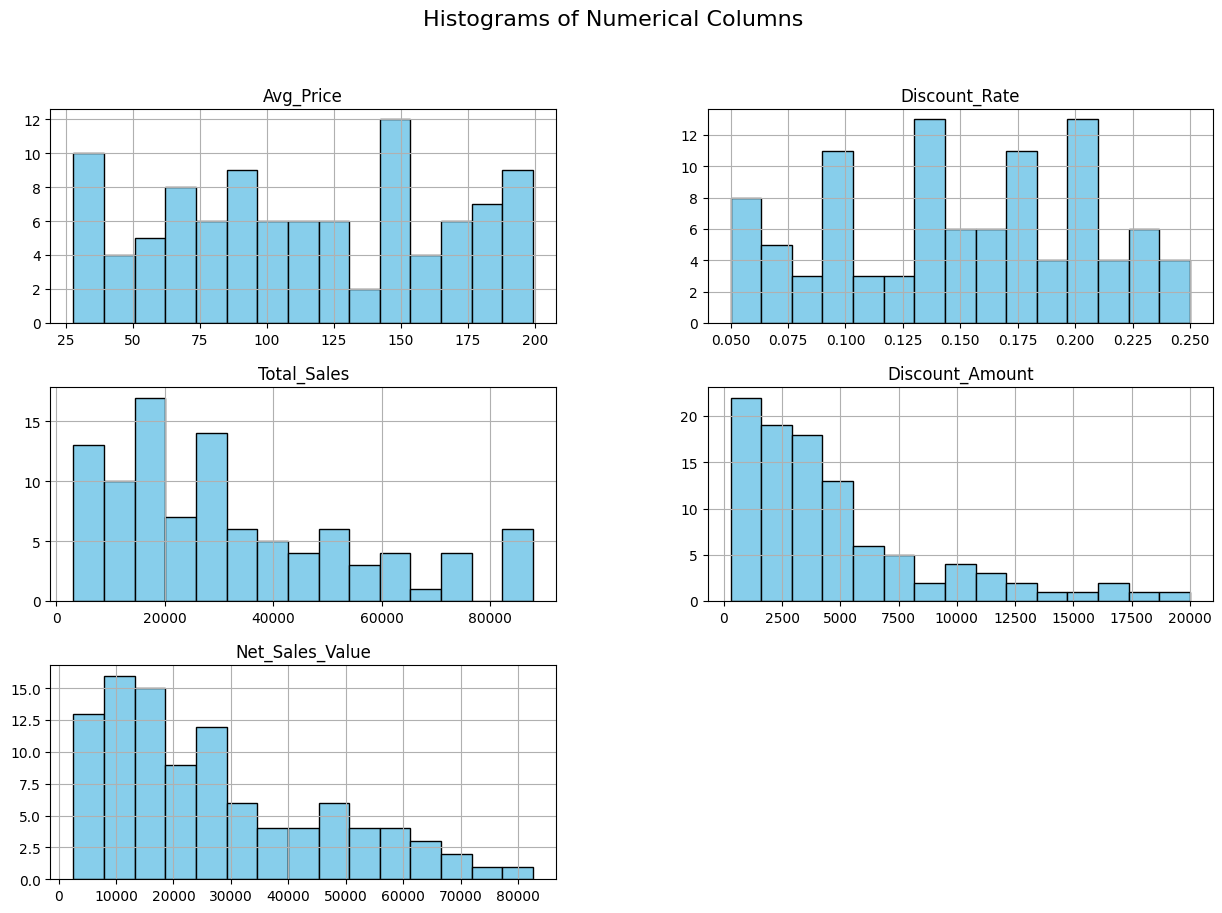

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns

df[num_cols].hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Columns", fontsize=16)
plt.show()


### **Box Plots for Outlier Detection**

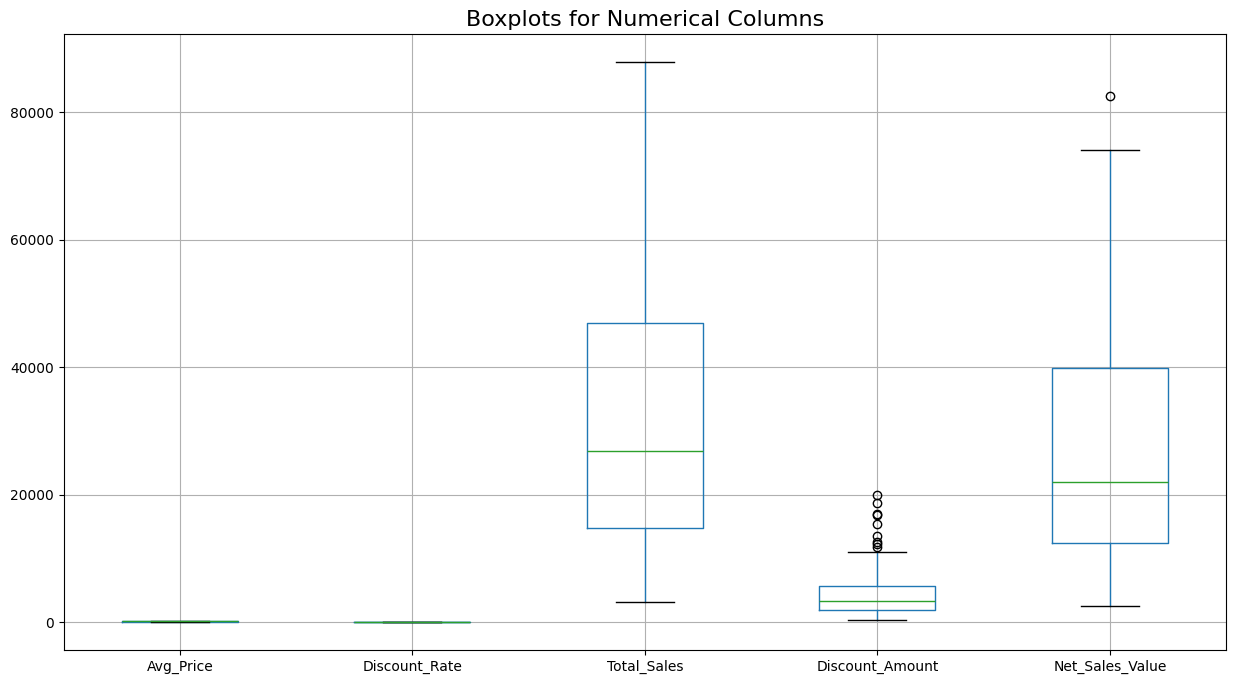

In [7]:

plt.figure(figsize=(15, 8))
df[num_cols].boxplot()
plt.title("Boxplots for Numerical Columns", fontsize=16)
plt.show()


### **Bar Chart Analysis for Categorical Columns**

C:\Users\SUJITH\AppData\Local\Temp\ipykernel_2248\1957207739.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")
C:\Users\SUJITH\AppData\Local\Temp\ipykernel_2248\1957207739.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")
C:\Users\SUJITH\AppData\Local\Temp\ipykernel_2248\1957207739.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")
C:\Users\SUJITH\AppData\Local\Temp\ipykernel_2248\1957207739.py:6: FutureWarning: 

Passing `palette` without as

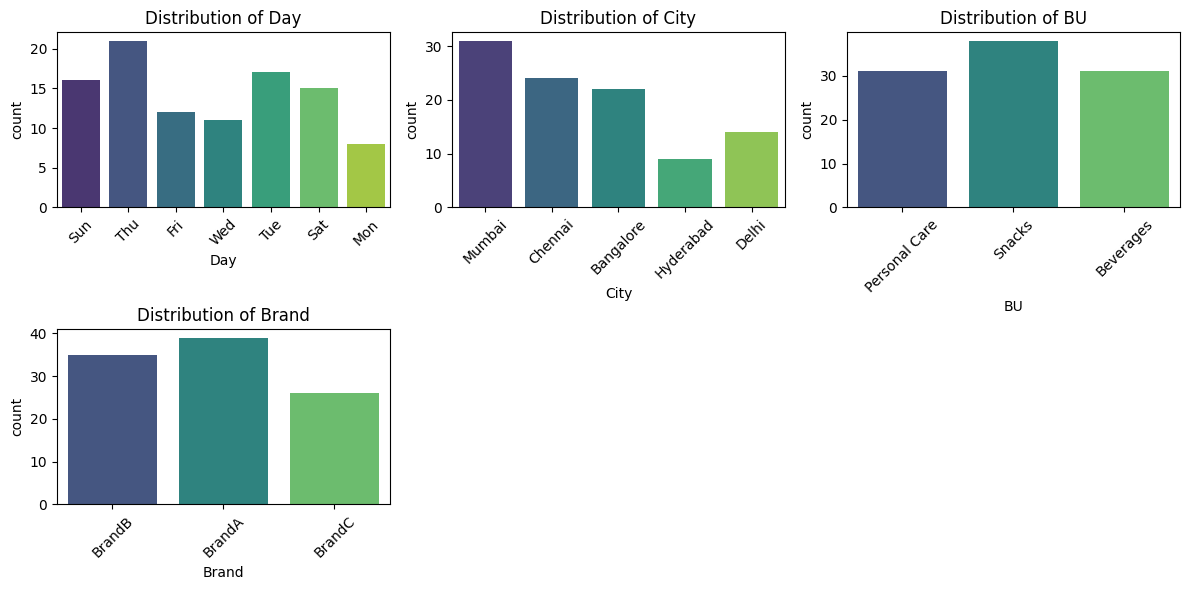

In [8]:

cat_cols = df.select_dtypes(include=["object"]).columns

plt.figure(figsize=(12, 6))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[col], palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### **Interpretation of Visualizations**
- **Histograms** show how data is distributed. Skewness or outliers can be identified.  
- **Boxplots** reveal the spread and detect outliers using IQR.  
- **Bar charts** help analyze category frequency and imbalance across categorical features.



## **Conclusion**
- Key numerical columns show moderate variability.  
- Certain products or cities may have higher sales or discounts.  
- Outliers exist in some numerical variables, which may represent high-performing items.  
- Categorical analysis shows how different brands or business units contribute to the dataset.

✅ The dataset is now ready for further data preprocessing and advanced analytics.
